# ML Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
import random
import metoder
import pandas as pd




Importing dataset:

In [2]:
#path:
#file_path = r"C:\Users\vikto\Documents\Skole\Datadrevne_systemer\ML_Project\glass_data-4_lev.csv"
file_path_training = "../Datasett/train_set.csv"
file_path_test = "../Datasett/test_set.csv"
file_path_total_set =   "../Datasett/mushrooms.csv"
#importing file and print how the structure of data were inported. 
df_training = pd.read_csv(file_path_training)
df_test = pd.read_csv(file_path_test)
df_total = pd.read_csv(file_path_total_set)



#drop ID number
#df = df.drop(columns=['Id'])

print(df_total['class'].dtype)
df_total.info()

object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   class                  8124 non-null   object
 1   capShape               8124 non-null   object
 2   capSurface             8124 non-null   object
 3   capColor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillAttachment         8124 non-null   object
 7   gillSpacing            8124 non-null   object
 8   gillSize               8124 non-null   object
 9   gillColor              8124 non-null   object
 10  stalkShape             8124 non-null   object
 11  stalkRoot              8124 non-null   object
 12  stalkSurfaceAboveRing  8124 non-null   object
 13  stalkSurfaceBelowRing  8124 non-null   object
 14  stalkColorAboveRing    8124 non-null   object
 15  stalkColorBelo

### Small exploration of data:

In [3]:
# Check the number of unique rows in the DataFrame
num_unique_rows = df_total.drop_duplicates().shape[0]

# Print the result
print("Number of unique rows:", num_unique_rows)

Number of unique rows: 8124


The data set clearly shows that T1, T2 is most frequently. 

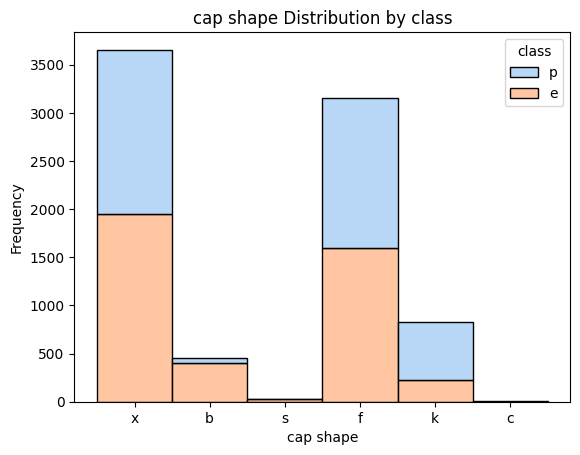

In [4]:
# Create a histogram of age with hue for income
sns.histplot(data=df_total, x='capShape', hue='class', multiple='stack', palette='pastel')

# Add labels and title
plt.xlabel('cap shape')
plt.ylabel('Frequency')
plt.title('cap shape Distribution by class')

# Show the plot
plt.show()

In [5]:
#for col in df.columns[:-1]:  # Exclude the 'Type' column
 #   sns.boxplot(x='Type', y=col, data=df)
  #  plt.show()

One-hot encoding to ensure the best result

In [6]:
# Perform one-hot encoding for all categorical columns except the "class" column
# Perform one-hot encoding for all categorical columns except the "class" column
df_train_encoded = pd.get_dummies(df_training, columns=["capShape", "capSurface", "capColor", "bruises", "odor", "gillAttachment", "gillSpacing", "gillSize", "gillColor", "stalkShape", "stalkRoot", "stalkSurfaceAboveRing", "stalkSurfaceBelowRing", "stalkColorAboveRing", "stalkColorBelowRing", "veilType", "veilColor", "ringNumber", "ringType", "sporePrintColor", "population", "habitat"])
df_test_encoded = pd.get_dummies(df_test, columns=["capShape", "capSurface", "capColor", "bruises", "odor", "gillAttachment", "gillSpacing", "gillSize", "gillColor", "stalkShape", "stalkRoot", "stalkSurfaceAboveRing", "stalkSurfaceBelowRing", "stalkColorAboveRing", "stalkColorBelowRing", "veilType", "veilColor", "ringNumber", "ringType", "sporePrintColor", "population", "habitat"])

# Replace "p" with 1 and "e" with 0 in the "class" column in the df_training and df_test DataFrames
df_train_encoded['class'] = df_train_encoded['class'].apply(lambda x: 1 if x == 'p' else 0)
df_test_encoded['class'] = df_test_encoded['class'].apply(lambda x: 1 if x == 'p' else 0)

# Splitting into features (X) and target variable (y)
X_train, y_train = df_train_encoded.drop(['class'], axis=1), df_train_encoded['class']
X_test, y_test = df_test_encoded.drop(['class'], axis=1), df_test_encoded['class']




### Make a neural network:

Split data to training and validation and Scale the data: 

Create pytorch model:

Evaluate model:

In [9]:
# Results storage as a dictionary
results = {}

In [10]:
# Call each function and store the results
accuracy, confusion_matrix = metoder.randomforest(X_train, X_test, y_train, y_test)
results['randomforest'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

In [11]:
accuracy, confusion_matrix = metoder.gradientboost(X_train, X_test, y_train, y_test)
results['gradientboost'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

In [12]:
accuracy, confusion_matrix = metoder.linearregression(X_train, X_test, y_train, y_test)
results['linearregression'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}


LinAlgError: SVD did not converge in Linear Least Squares

In [13]:

accuracy, confusion_matrix = metoder.decisionregressor(X_train, X_test, y_train, y_test)
results['decisionregressor'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}


In [14]:

accuracy, confusion_matrix = metoder.mlpregression(X_train, X_test, y_train, y_test)
results['mlpregression'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

In [ ]:
accuracy, confusion_matrix = metoder.supportvectoregressor(X_train, X_test, y_train, y_test)
results['supportvectoregressor'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

In [ ]:

accuracy, confusion_matrix = metoder.kneighborsregressor(X_train, X_test, y_train, y_test)
results['kneighborsregressor'] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
#models = ['KNN Regressor', 'Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor',
# 'Gradient Boosting Regressor','Support Vector Regressor', 'MLP Regressor']
#tests_score = [KNN, lr, dr, rf, gb, svr, mlp]
compare_models = pd.DataFrame({ "Algorithms": result['function_name'], "accuracy": result['accuracy'] })
compare_models.sort_values(by = "Tests Score", ascending = False)

NameError: name 'result' is not defined

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Score", y = "Algorithms", data = compare_models)
plt.show()